https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py

https://medium.com/@leetandata

# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn as sk
import sklearn.cluster as skcl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor


In [3]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [4]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 
#df.to_numpy()
print(df.shape)
df.describe().transpose()

(500, 2)


,count,mean,std,min,25%,50%,75%,max
speed,500.0,12.590398,7.224991,0.0,6.32475,12.5505,18.77525,25.00
power,500.0,48.014860,41.614565,0.0,5.28750,41.6450,93.54000,113.56


In [5]:
X = df['speed']
y = df['power']

#min_y = min(y)
#max_y = max(y)

In [6]:
#Best fit straight line
X_avg = np.mean(X)
y_avg = np.mean(y)

X_zero = X - X_avg
y_zero = y - y_avg

m = np.sum(X_zero * y_zero)/(np.sum(X_zero * X_zero))
c = y_avg - m * X_avg

In [51]:
#Best fit sigmoid curve
#https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python

def sigmoid(X, L, X0, k, b):
    s = L / (1 + np.exp(-k*(X-X0)))+b
    return(s)

p0 = [max(y), np.median(X), 1, min(y)] #mandatory initial guess

popt, pcov = curve_fit(sigmoid, X, y, p0, method='dogbox')

#plt.plot(popt, pcov) #check visual

C:\Users\Claire Laptop\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


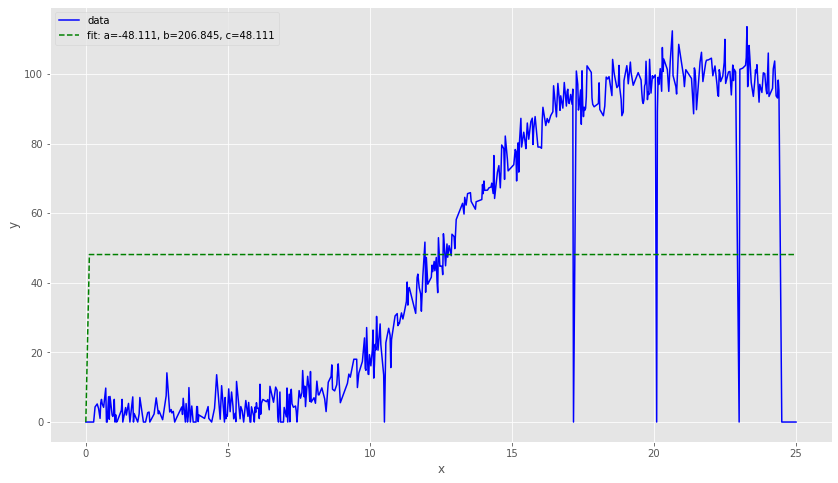

In [50]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = df['speed']
ydata = df['power']
plt.plot(X, y, 'b-', label='data')


popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


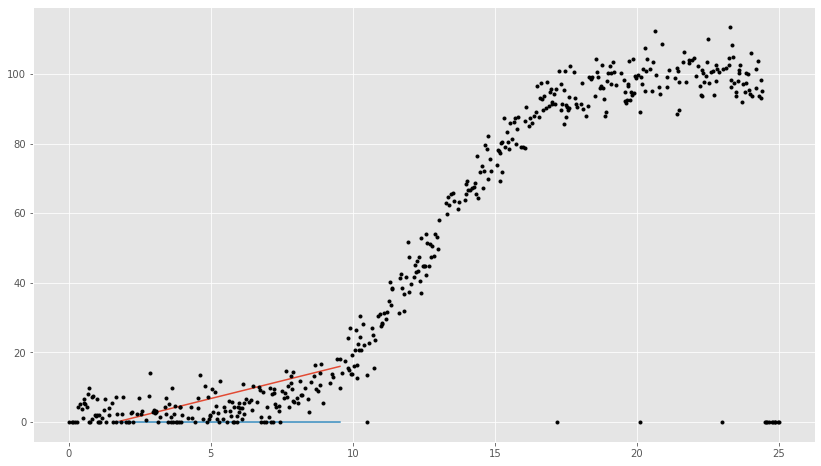

In [28]:
#https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

#y_data

X = df['speed']
y = df['power']

def test_func(x, a, b):
    return a * np.sin(b * x)

#p0 = [max(y), np.median(X), 1, min(y)] #mandatory initial guess
#params, params_covariance = curve_fit(test_func, X, y, p0)

params, params_covariance = curve_fit(test_func, X, y, p0=[2,2])

#popt, pcov = curve_fit(sigmoid, X, y, p0, method='dogbox')


plt.plot(params, params_covariance) #check visual
plt.plot(X, y,'k.', label="Data")



In [30]:
#https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

X = df['speed']
y = df['power']

def test_func(x, L, x0, k, b):
    return L / (1 + np.exp(-k*(X-X0)))+b

#TypeError: test_func() missing 2 required positional arguments: 'k' and 'b'

params, params_covariance = curve_fit(test_func, X, y, p0=[2,2])

plt.plot(params, params_covariance) #check visual
plt.plot(X, y,'k.', label="Data")


TypeError: test_func() missing 2 required positional arguments: 'k' and 'b'

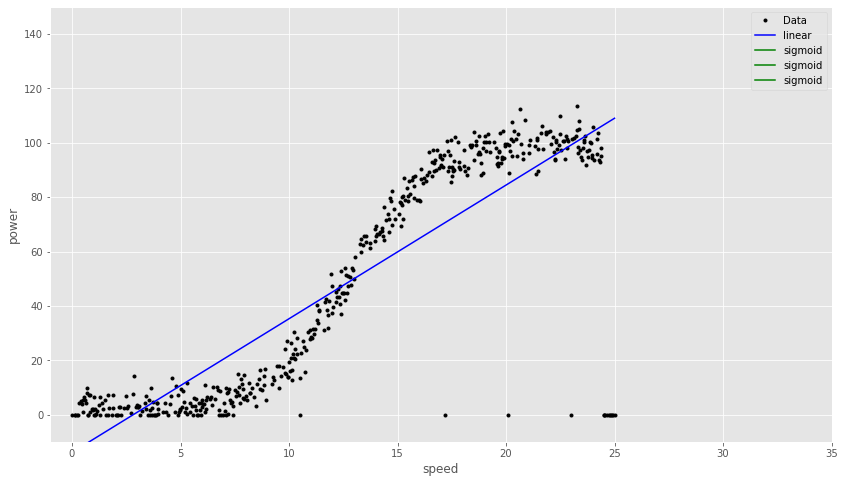

In [31]:
#Best fit straight line
plt.plot(X, y,'k.', label="Data")

plt.plot(X, m * X + c, 'b-', label="linear")#plot best fit straight line

plt.plot(popt, pcov, 'g-', label="sigmoid")

plt.xlabel('speed')
plt.ylabel('power')

plt.xlim(-1,35)
plt.ylim(-10,150)

plt.legend()
plt.show()

In [ ]:
target_column = ['power'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

In [ ]:
X = df['speed']
y = df['power']

In [ ]:
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

regr = MLPRegressor(random_state=1, max_iter=10000).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)


predict_train = regr.predict(X_train)
predict_test = regr.predict(X_test)




<br>

# Lets try again



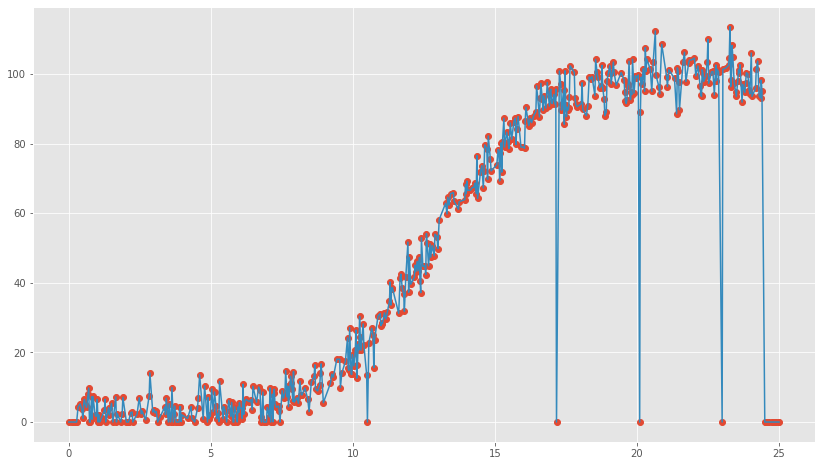

In [49]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = df['speed']
y = df['power']

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x)) 
    return(sig)

#x = np.arange(0, 10)
#y = 1 / (1 + np.exp(-x))

f = interpolate.interp1d(x, y)

xnew = df['speed']
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d